## McDonalds Market Segmentation Analysis


In [1]:
#!pip install bioinfokit

In [2]:
import numpy as np 
import pandas as pd 

In [3]:
import os
import warnings
warnings.filterwarnings("ignore")

In [4]:
import scipy as sp
import seaborn as sns

In [5]:
data = pd.read_csv("mcdonalds.csv") #loading data

In [6]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [8]:
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [9]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [10]:
data['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [11]:
data['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [12]:
data['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

In [13]:
df1 = data.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1) 

In [14]:
df1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
df_encoded = df1.apply(LabelEncoder().fit_transform) #transforming categorical values into numarical values

In [17]:
df_encoded.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [18]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [19]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [20]:
# pca 
pca_data = preprocessing.scale(df_encoded)
pca = PCA(n_components=11)
pc = pca.fit_transform(pca_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
# create dataframe with pca values 
pf.head()

explained_variance_ratio = pca.explained_variance_ratio_
singular_values = pca.singular_values_
components = pca.components_

print("Standard deviation:\n", singular_values)
print("Proportion of Variance:\n", explained_variance_ratio)
print("Cumulative Proportion:\n", explained_variance_ratio.cumsum())

Standard deviation:
 [63.91179298 48.69332668 44.78138456 39.63136078 36.52831435 33.7082743
 32.22832023 29.33600188 27.59057302 21.14107869 19.31862906]
Proportion of Variance:
 [0.25556637 0.14834762 0.12546909 0.09826971 0.08348356 0.07109102
 0.06498559 0.05384477 0.04762809 0.02796379 0.0233504 ]
Cumulative Proportion:
 [0.25556637 0.40391399 0.52938308 0.62765279 0.71113635 0.78222737
 0.84721295 0.90105773 0.94868581 0.9766496  1.        ]


In [21]:
pf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

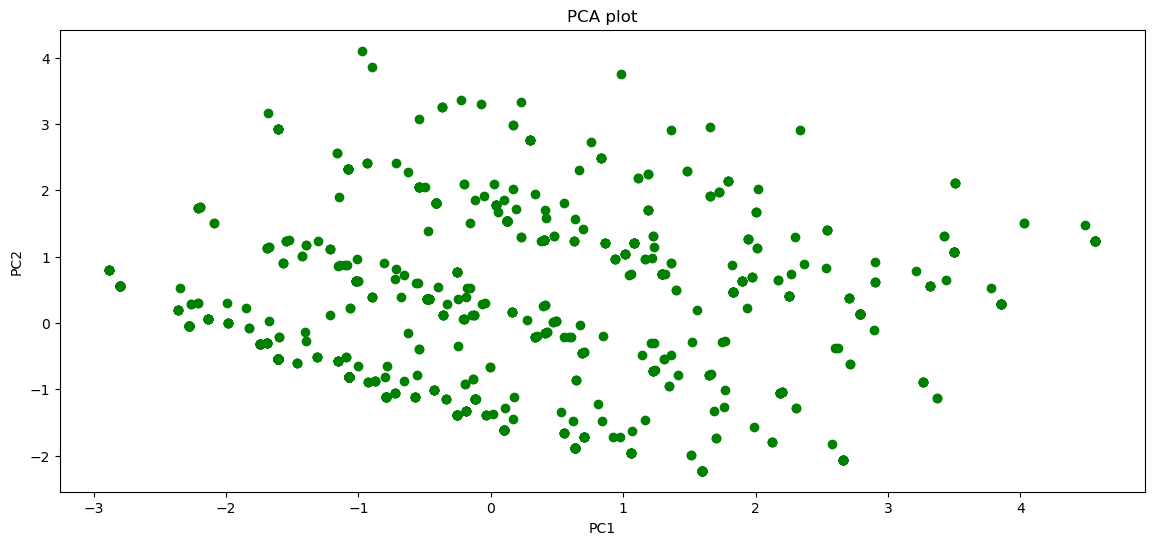

In [23]:
plt.figure(figsize=(14,6))
plt.scatter(pc[:, 0], pc[:, 1], c='green')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA plot')
plt.show()

In [24]:
# pca componant for each feature
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['feature'] = df_encoded.columns.values
loadings_df = loadings_df.set_index('feature')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
feature,,,,,,,,,,,
yummy,-0.406955,0.282615,-0.259588,0.026237,0.346857,-0.124916,0.159878,0.016587,-0.195341,0.691446,-0.091851
convenient,-0.308827,-0.045682,-0.317151,-0.009424,-0.437148,0.188966,-0.661814,0.150033,-0.336539,0.028831,0.021460
spicy,-0.023320,0.069982,0.020170,0.845496,-0.185551,0.438661,0.214188,-0.027835,0.025239,0.058187,-0.041960
fattening,0.177861,-0.205590,-0.608077,-0.023396,0.086934,0.107520,-0.023851,-0.720478,0.105052,-0.020311,-0.074626
greasy,0.267796,-0.136300,-0.389568,0.330854,0.343713,-0.278329,-0.307300,0.487275,0.346137,-0.015160,-0.031047
fast,-0.213039,-0.282441,-0.211395,0.090363,-0.568939,-0.572734,0.392436,0.055976,0.099235,0.017917,-0.054448
cheap,-0.289134,-0.575032,0.125157,0.114477,0.256981,0.020657,-0.008895,-0.064667,-0.062027,0.060323,0.691923
tasty,-0.426115,0.242199,-0.269648,0.072691,0.286099,-0.053053,0.197364,0.059289,-0.213587,-0.713426,0.006426
expensive,0.290944,0.567528,-0.183298,0.035510,-0.207362,-0.171160,0.015198,-0.061727,-0.009675,0.029581,0.693614


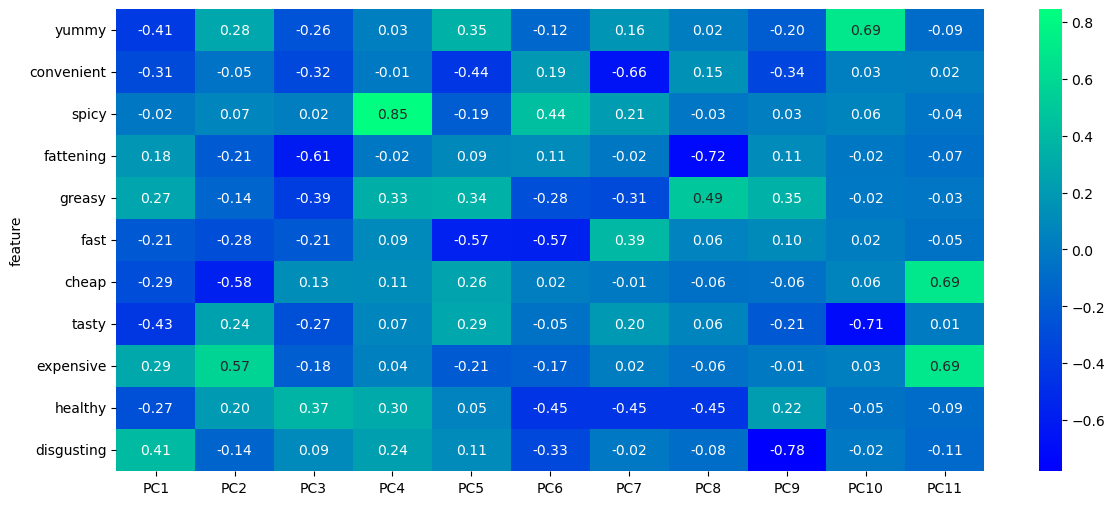

In [25]:
plt.rcParams['figure.figsize'] = (14,6)
ax = sns.heatmap(loadings_df, annot=True, cmap='winter', fmt='.2f', cbar=True)
plt.show()

In [26]:
from bioinfokit.visuz import cluster

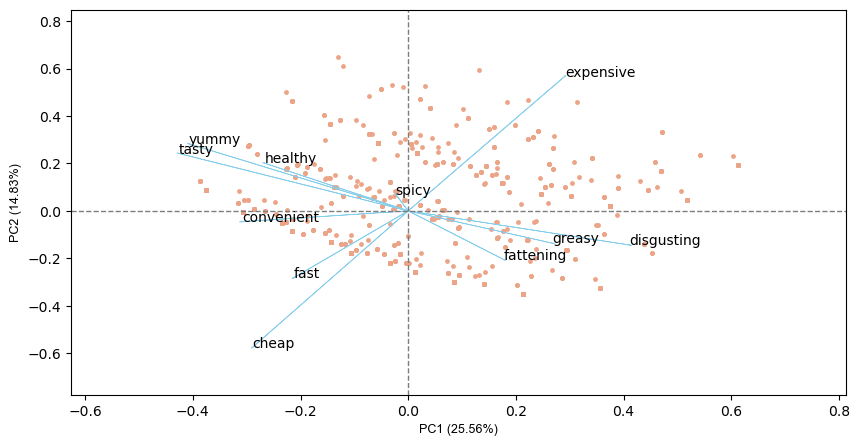

In [27]:
#2d biplot with pca score 
pca_scores = PCA().fit_transform(pca_data)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data.columns.values,
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

In [28]:
#kmeans-clustering 
from sklearn.cluster import AgglomerativeClustering, KMeans
from collections import Counter

In [29]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_encoded)
data['cluster_num'] = kmeans.labels_

print ('Labels:', kmeans.labels_)

print ('WCSS:', kmeans.inertia_)

print('No. of iterations: ', kmeans.n_iter_)

print('Cluster centroids: ', kmeans.cluster_centers_)

print('Cluster size: ', Counter(kmeans.labels_))

Labels: [2 0 0 ... 0 1 3]
WCSS: 1603.0604440558916
No. of iterations:  7
Cluster centroids:  [[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]
Cluster size:  Counter({1: 580, 0: 323, 2: 304, 3: 246})


In [30]:
# Convert "Yes" to 1 and everything else to 0 and find column means to 2 decimal point 

MD_x = data.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)
column_means = MD_x.mean()
rounded_column_means = column_means.round(2)
print(rounded_column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [31]:
# Kmeans clustering using elbow method 

np.random.seed(1234)
inertia_values = []
cluster_labels = {}
for k in range(2, 9):
    km = KMeans(n_clusters=k, n_init=10, random_state=1234)
    km.fit(MD_x)
    inertia_values.append(km.inertia_)
    cluster_labels[k] = km.labels_
optimal_k = 3
optimal_cluster_labels = cluster_labels[optimal_k]
print(optimal_cluster_labels)

[1 0 0 ... 0 2 1]


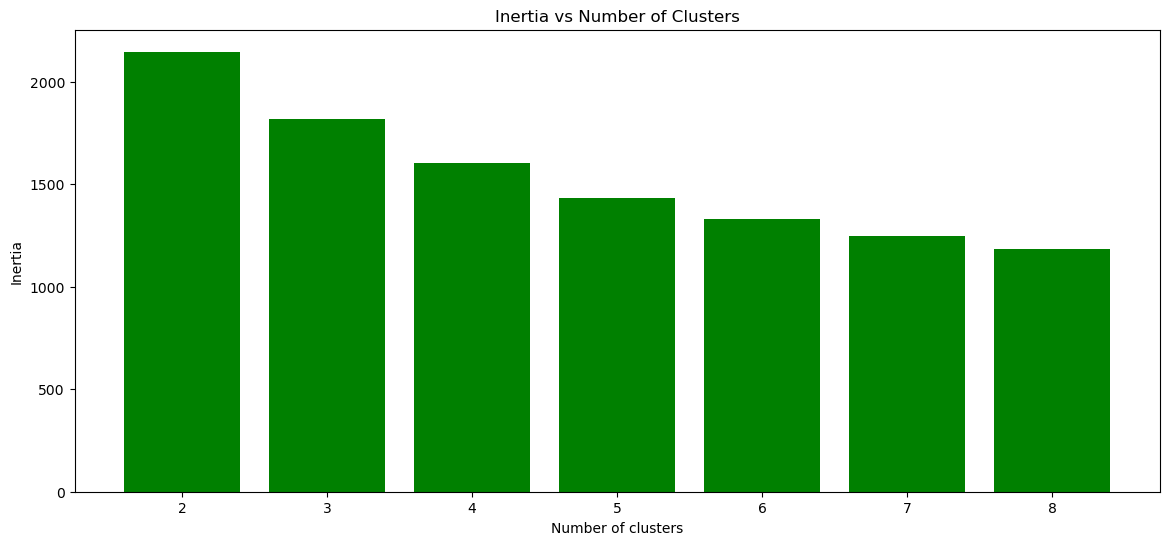

In [32]:
#plot the inertia value

plt.bar(range(2, 9), inertia_values, color='green')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.show()

In [33]:
# #create a function for plotting the features

# def EDA(data, figuresize):
#     cat = []
#     con = []
#     from warnings import filterwarnings
#     filterwarnings("ignore")
#     u = int((data.shape[1] + 1) / 2)
#     plt.figure(figsize=figuresize)
#     x = 1

#     for i in data.columns:
#         if data[i].dtypes == "object":
#             cat.append(i)
#             plt.subplot(u, 2, x)
#             x = x + 1
#             sns.countplot(data=data, x=i)
#         else:
#             con.append(i)

#     for i in con:
#         plt.subplot(u, 2, x)
#         x = x + 1
#         sns.distplot(data[i].dropna(), kde=False)  # Exclude missing values

#     print(data[con].corr())

# EDA(data, (20, 30))

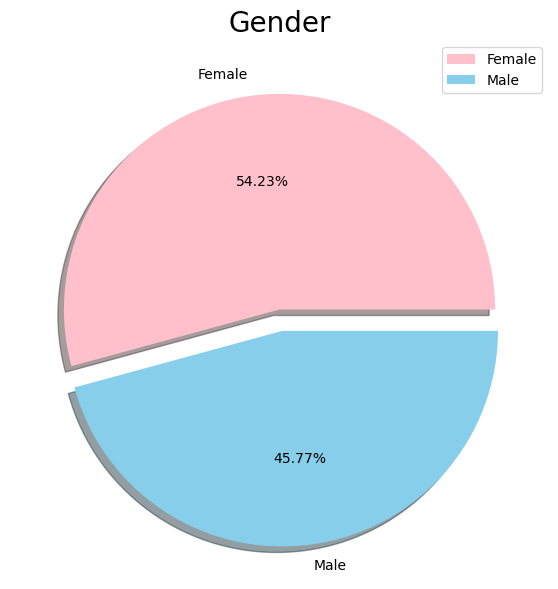

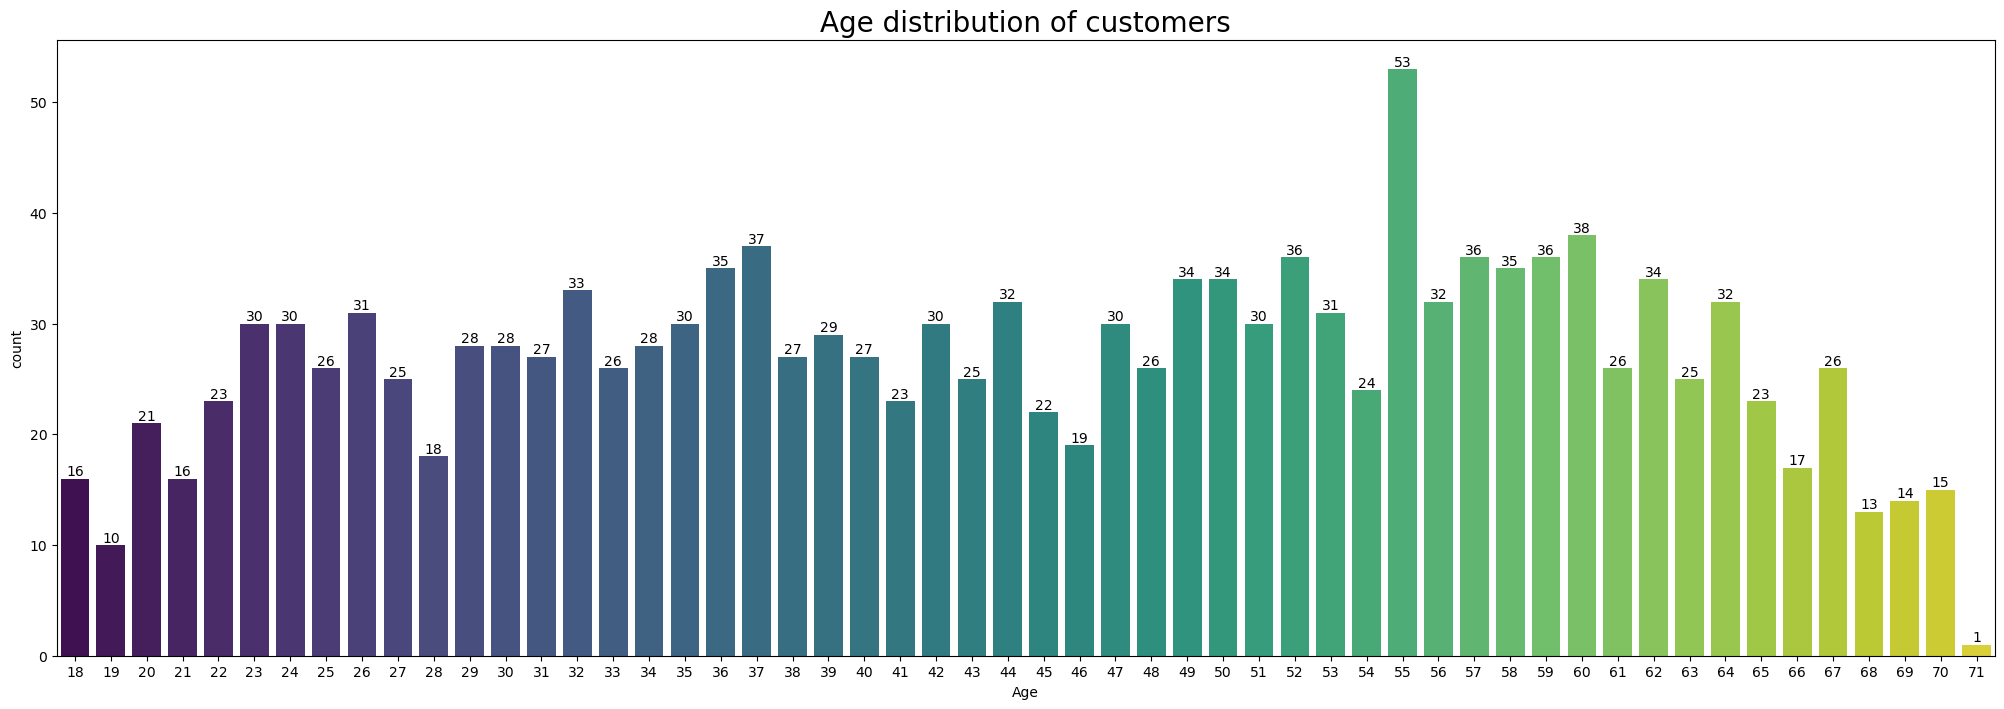

In [34]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['pink', 'skyblue']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()


plt.rcParams['figure.figsize'] = (25, 8)
datag = sns.countplot(x=data['Age'], palette = 'viridis')
datag.bar_label(datag.containers[0])
plt.title('Age distribution of customers', fontsize = 20)
plt.show()

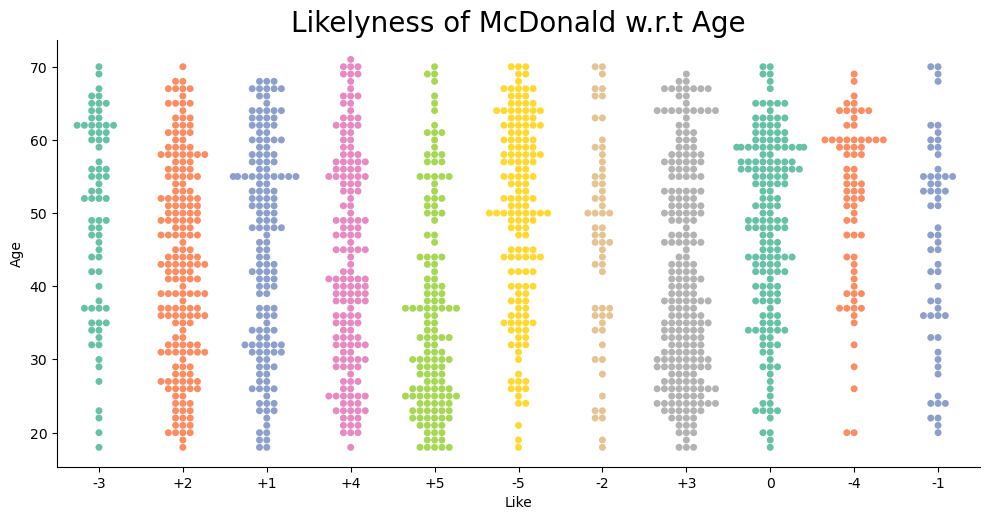

In [35]:
data['Like'] = data['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

# plotting the results
sns.catplot(data=data, x="Like", y="Age", orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age', fontsize=20)
plt.show()

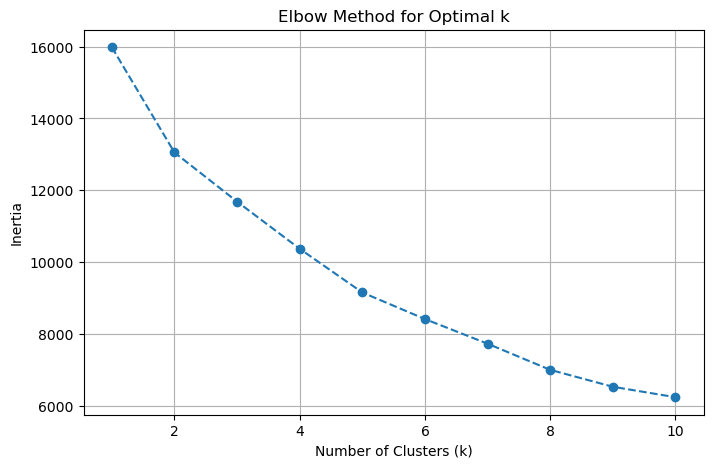

In [36]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid()
plt.show()


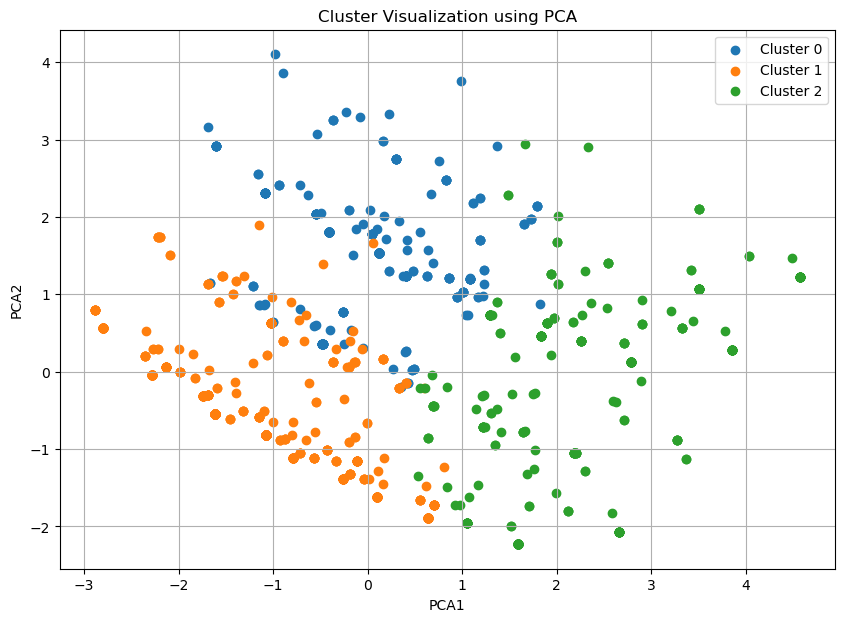

In [37]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(pca_data)

# Fit KMeans with the chosen number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_data)

# Scatter plot of clusters
plt.figure(figsize=(10, 7))
for cluster in range(3):
    cluster_points = reduced_data[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")

plt.title("Cluster Visualization using PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.grid()
plt.show()
